<a href="https://colab.research.google.com/github/sandeep1847e/MSc-Project/blob/main/codes/GNN_attempt_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'pp24tops20KE.csv'
df = pd.read_csv(file_path)
pd.set_option('display.width', 1000)

print(df.head())


   event_no  jet_no     jet_pt   jet_eta   jet_phi   jet_mass  signal_or_background
0         1       1  325.75055 -0.337415 -0.428045  56.044598                   0.0
1         1       2  282.52902  0.035443 -2.732777  77.315950                   0.0
2         1       3  214.63832 -0.699969 -3.098346  21.759722                   0.0
3         1       4  150.36577 -0.098526  2.244453  11.167752                   0.0
4         1       5  130.92741 -0.918064 -0.642317  13.407317                   0.0


In [3]:
# for event in df['event_no'].unique():
#     event_data = df[df['event_no'] == event]

#     plt.figure(figsize=(8, 6))
#     plt.scatter(event_data['jet_eta'], event_data['jet_pt'], label=f'Event {event}')
#     plt.title(f'Jets for Event {event}')
#     plt.xlabel('Jet Eta')
#     plt.ylabel('Jet Pt')
#     plt.ylim(0, event_data['jet_pt'].max() * 1.1)  # Set y-limit to avoid cutting off points
#     plt.grid()
#     plt.legend()
#     plt.show()


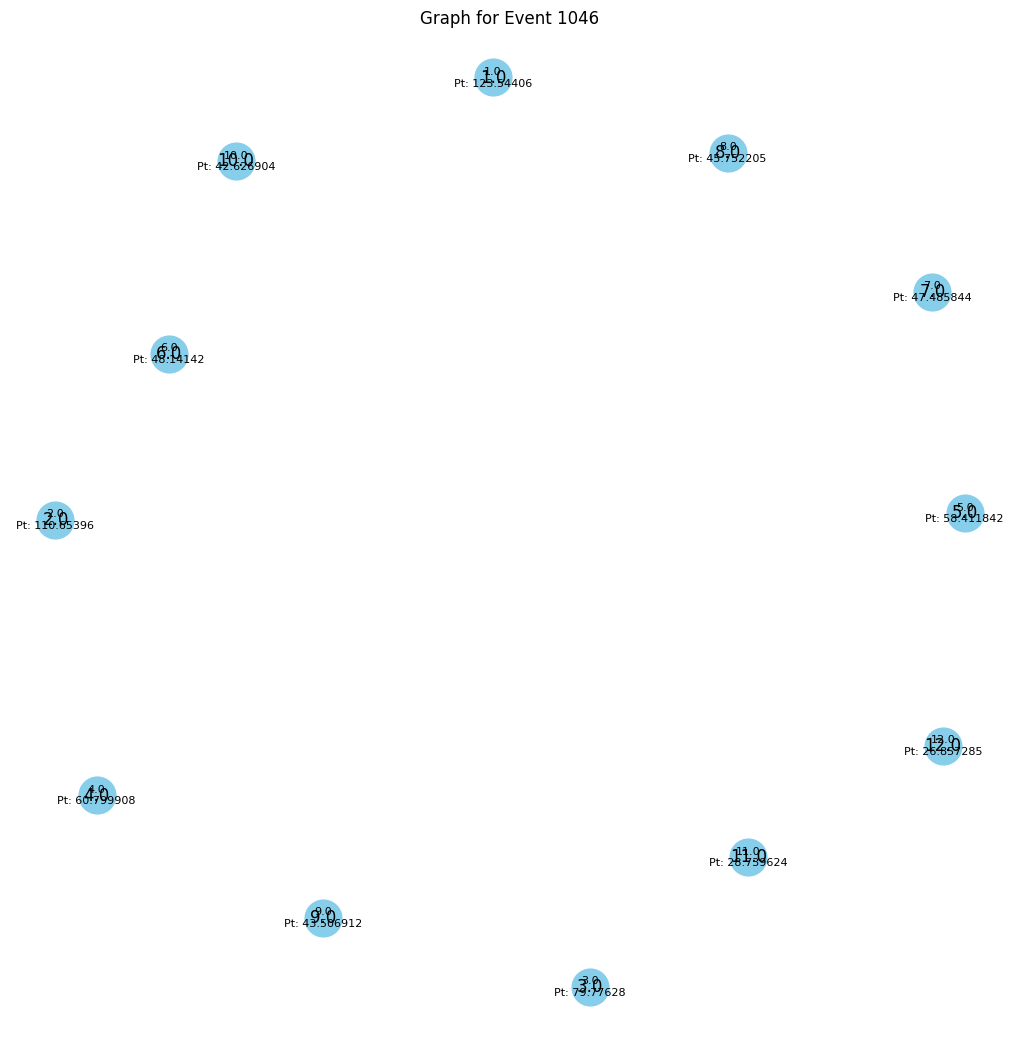

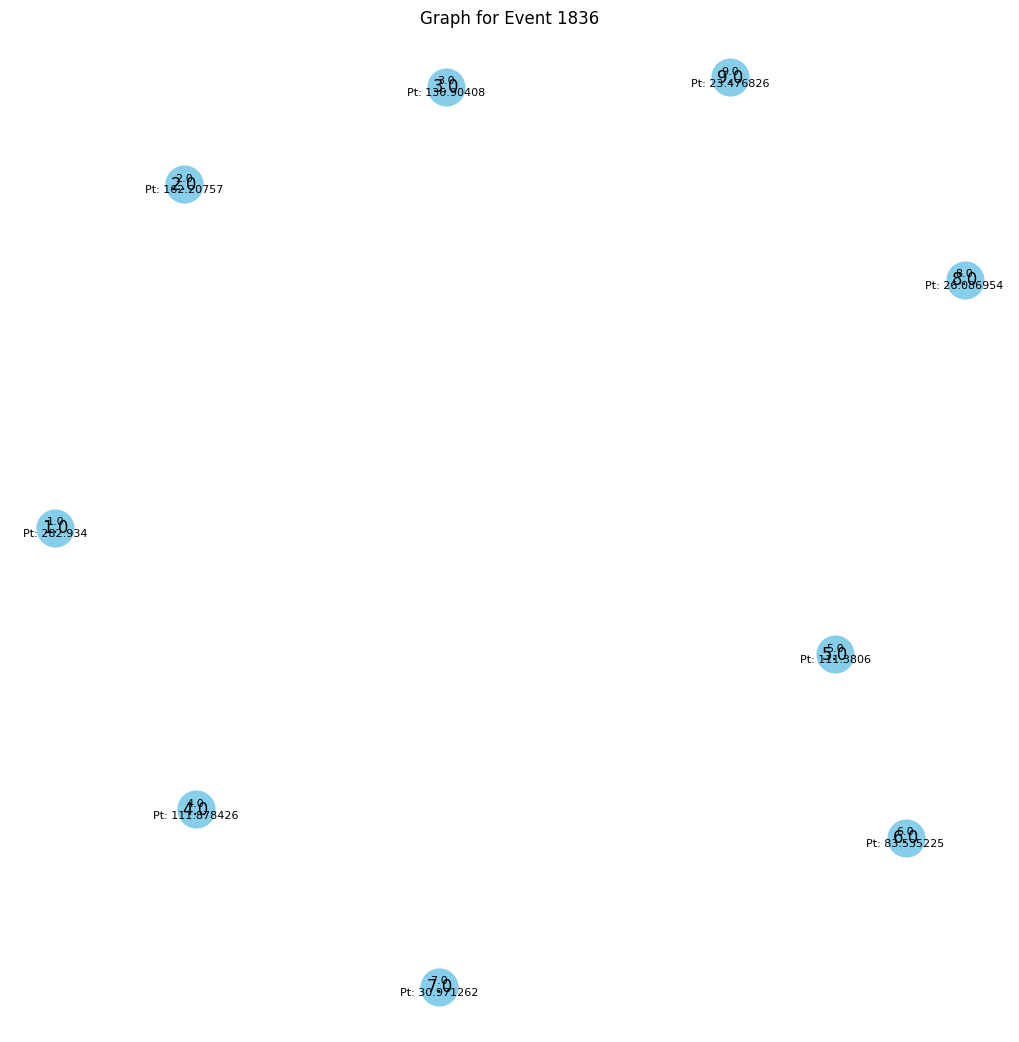

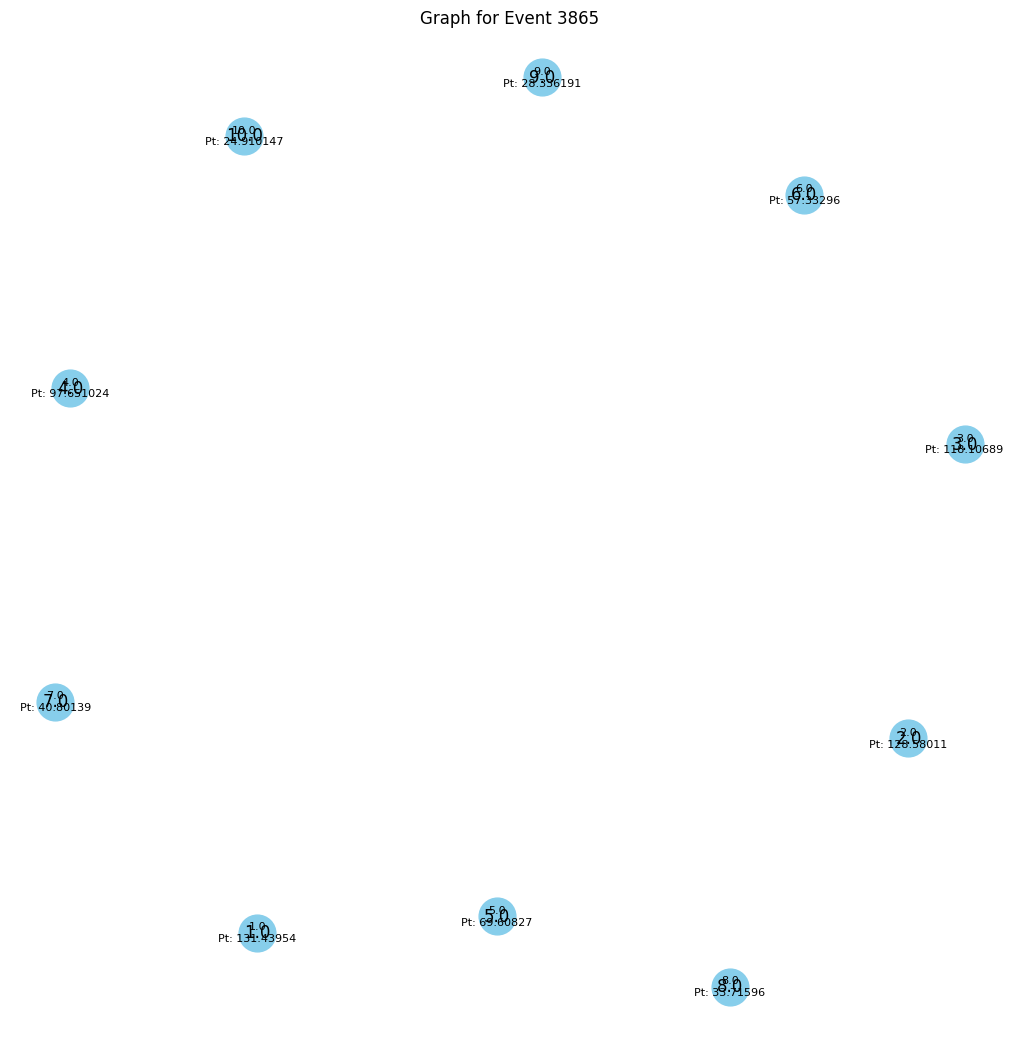

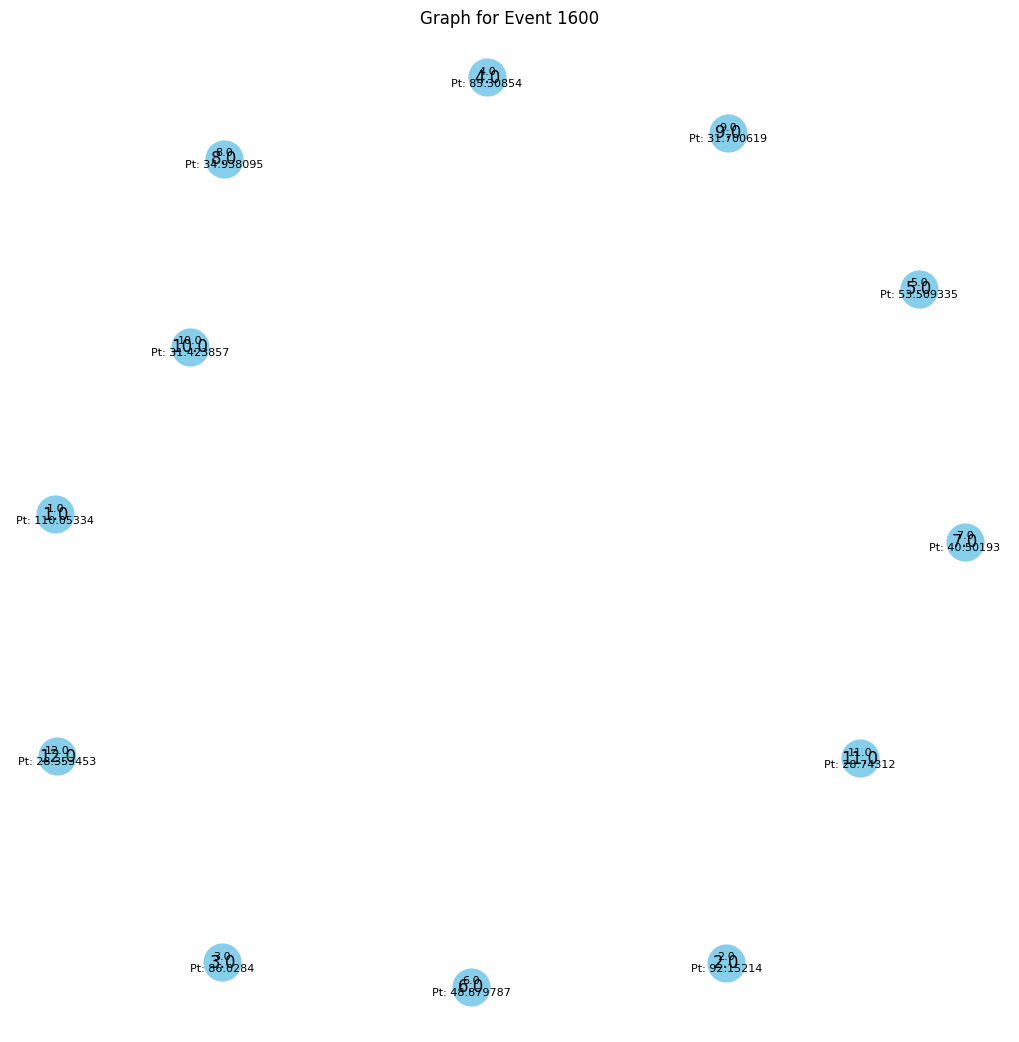

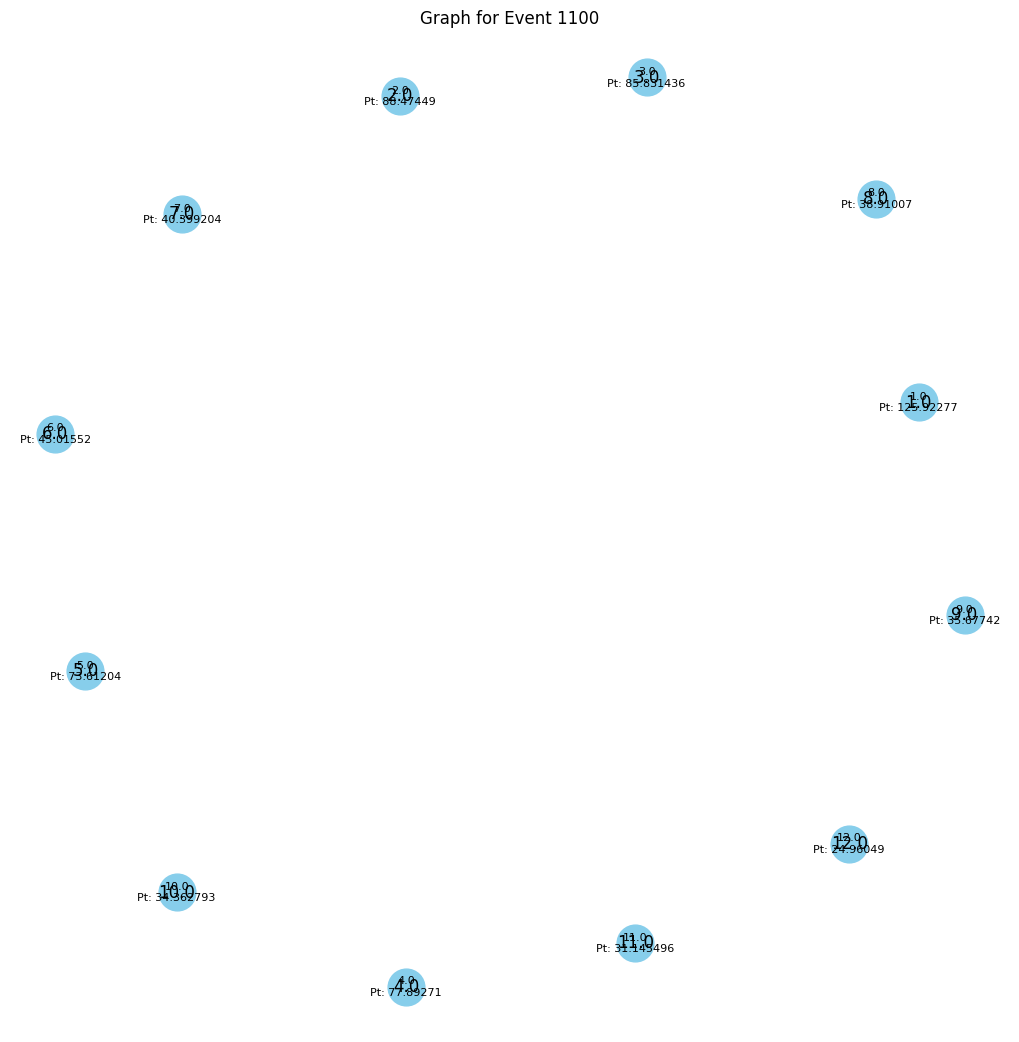

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_graph_for_event(event_data):
    G = nx.Graph()

    # Adding nodes with features
    for _, row in event_data.iterrows():
        G.add_node(row['jet_no'],
                   jet_pt=row['jet_pt'],
                   jet_eta=row['jet_eta'],
                   jet_phi=row['jet_phi'],
                   jet_mass=row['jet_mass'],
                   signal_or_background=row['signal_or_background'])

    # Adding edges based on proximity in (eta, phi) space
    for i in range(len(event_data)):
        for j in range(i + 1, len(event_data)):
            eta_i = event_data.iloc[i]['jet_eta']
            phi_i = event_data.iloc[i]['jet_phi']
            eta_j = event_data.iloc[j]['jet_eta']
            phi_j = event_data.iloc[j]['jet_phi']

            # Calculate the distance (could use a threshold for edge creation)
            distance = np.sqrt((eta_i - eta_j) ** 2 + (phi_i - phi_j) ** 2)
            if distance < 0.4:  # Adjust threshold as necessary
                G.add_edge(event_data.iloc[i]['jet_no'],
                           event_data.iloc[j]['jet_no'],
                           weight=distance)

    return G

# Randomly select a few events to plot
num_events_to_plot = 5  # Adjust this number as needed
sample_events = df['event_no'].sample(n=num_events_to_plot, random_state=1)  # Set random_state for reproducibility

# Iterate through the sampled events and create graphs
for event in sample_events:
    event_data = df[df['event_no'] == event]
    G = create_graph_for_event(event_data)

    # Plotting the graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # Positioning the nodes
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12)

    # Add node attributes as labels
    labels = {node: f"{node}\nPt: {data['jet_pt']}" for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    plt.title(f'Graph for Event {event}')
    plt.show()


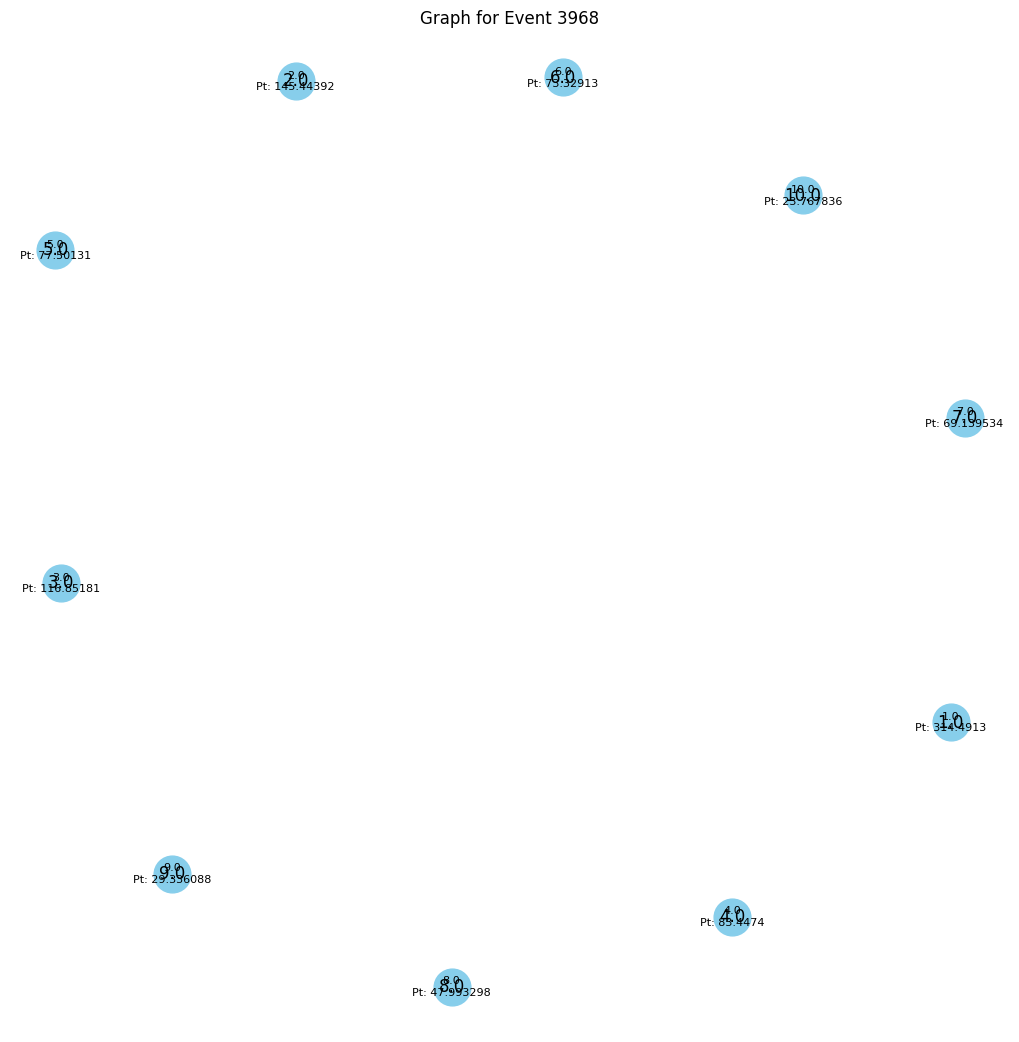

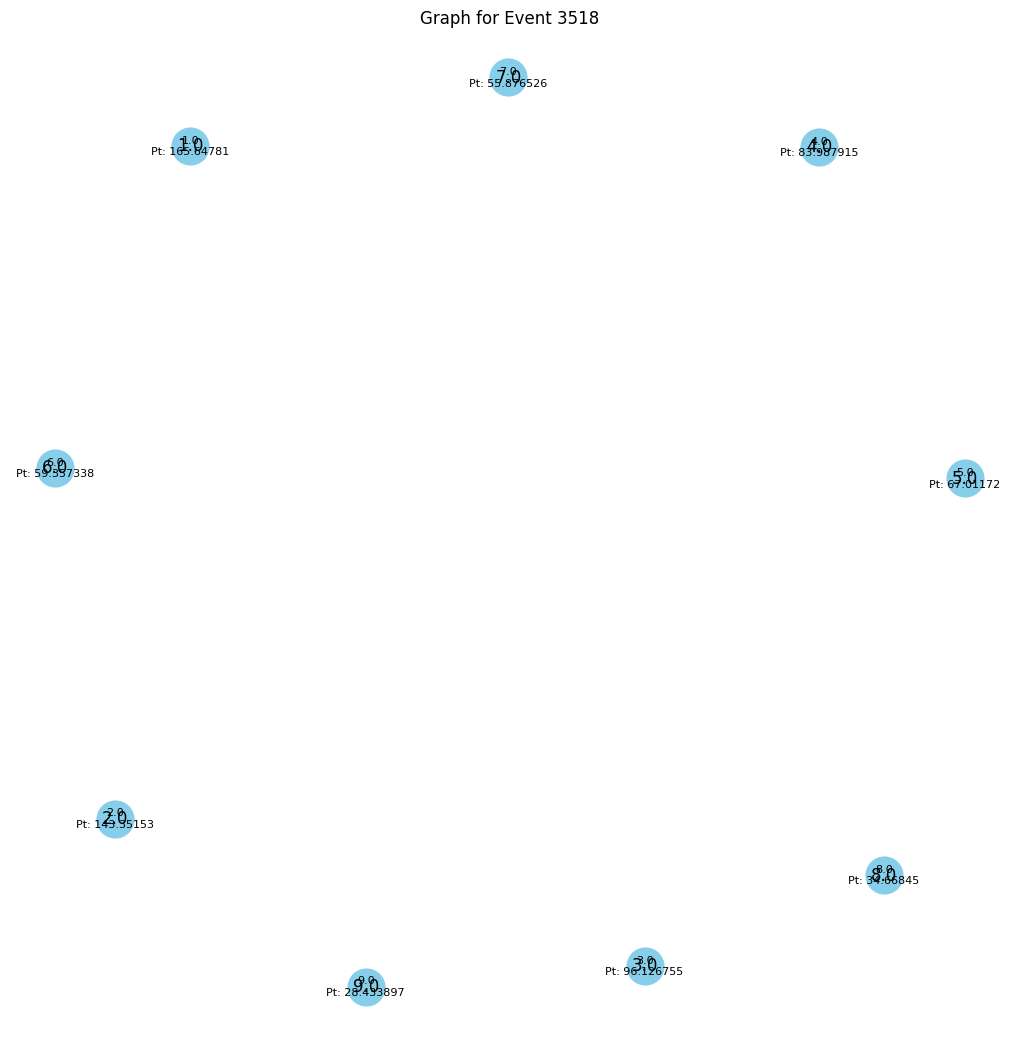

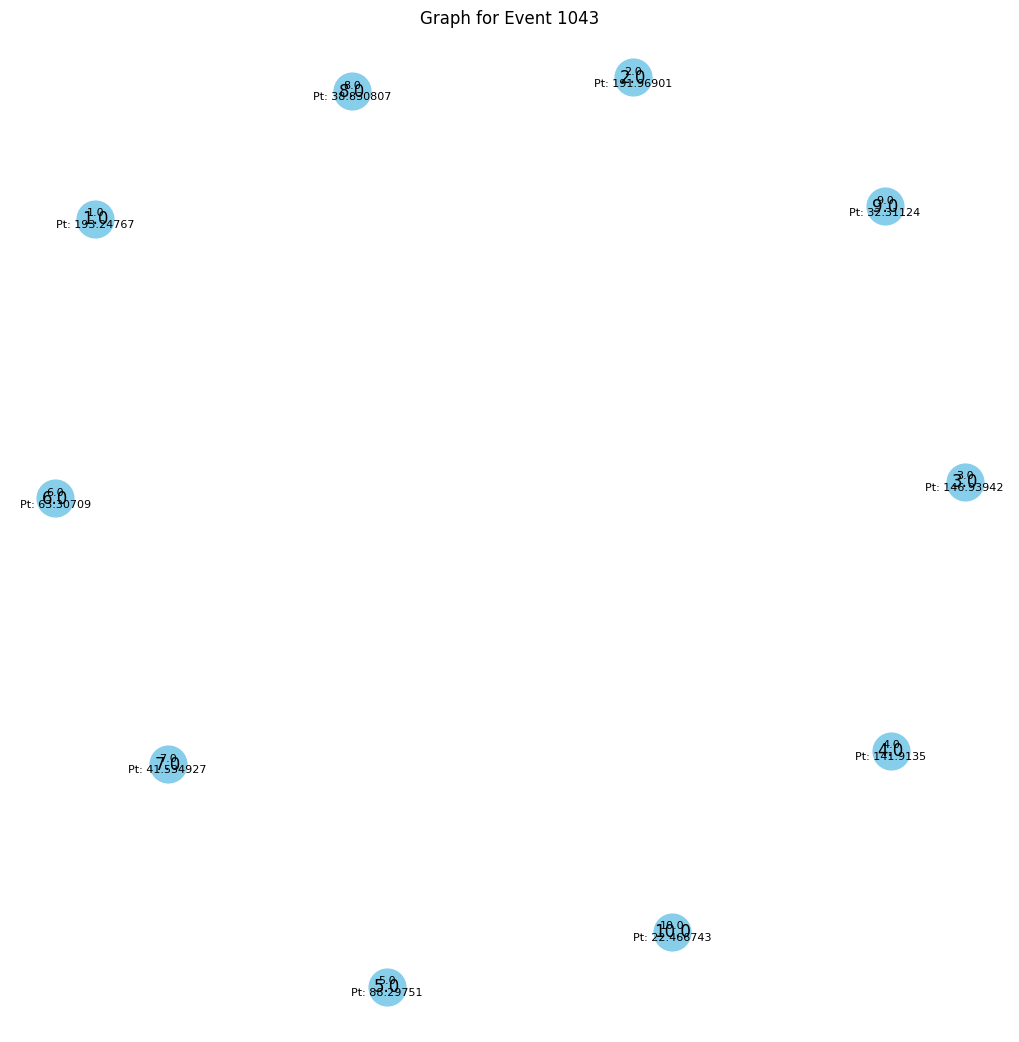

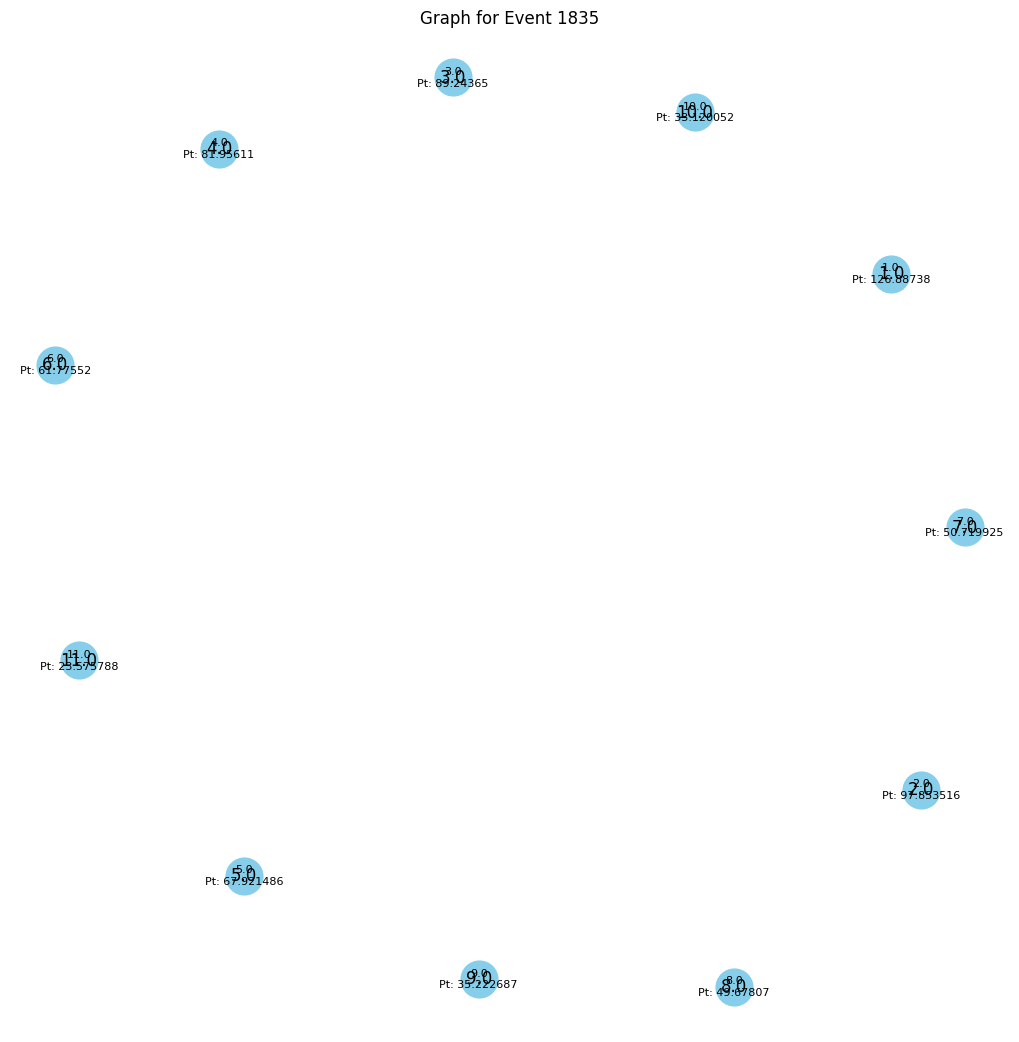

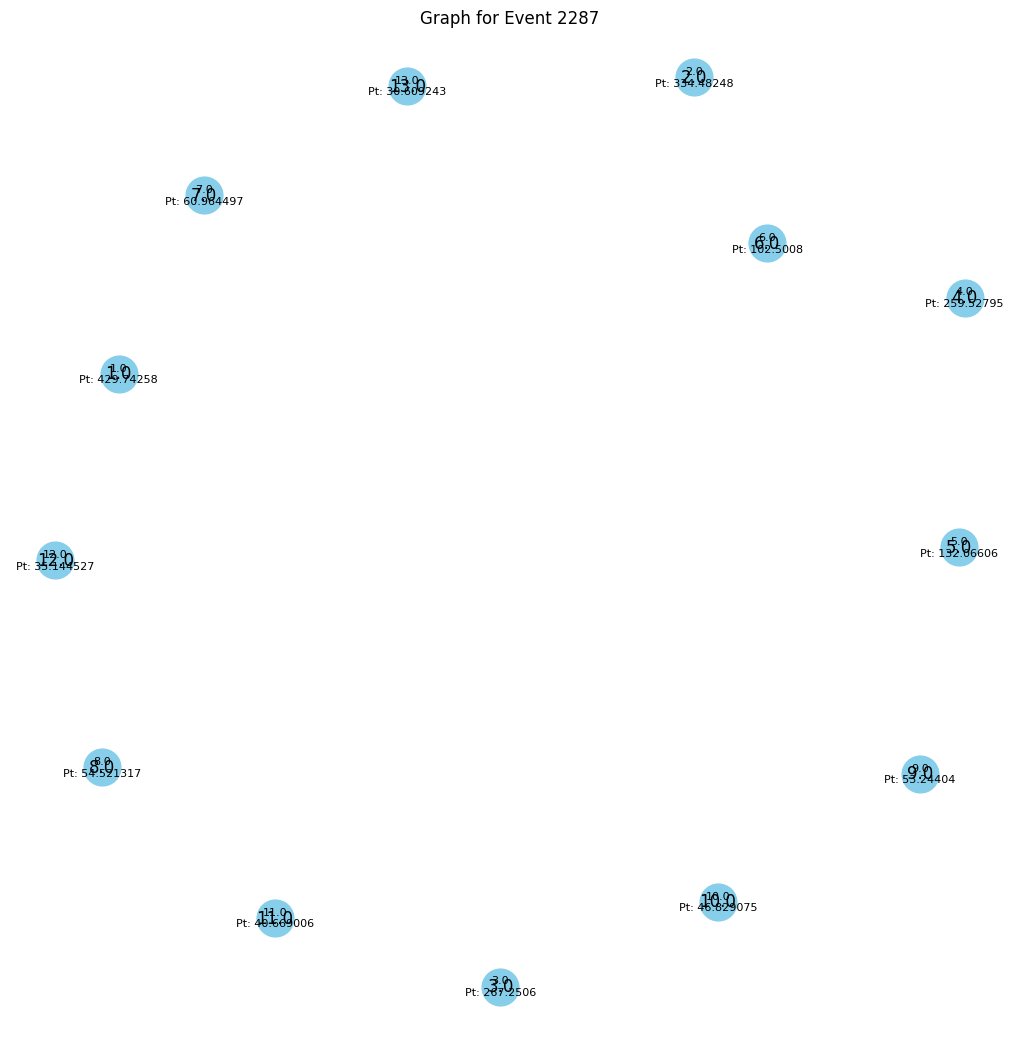

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Example: df = pd.read_csv('your_file.csv')

# Function to create a graph for each event
def create_graph_for_event(event_data):
    G = nx.Graph()

    # Adding nodes with features
    for _, row in event_data.iterrows():
        G.add_node(row['jet_no'],
                   jet_pt=row['jet_pt'],
                   jet_eta=row['jet_eta'],
                   jet_phi=row['jet_phi'],
                   jet_mass=row['jet_mass'],
                   signal_or_background=row['signal_or_background'])

    # Adding edges based on proximity in (eta, phi) space
    for i in range(len(event_data)):
        for j in range(i + 1, len(event_data)):
            eta_i = event_data.iloc[i]['jet_eta']
            phi_i = event_data.iloc[i]['jet_phi']
            eta_j = event_data.iloc[j]['jet_eta']
            phi_j = event_data.iloc[j]['jet_phi']

            # Calculate the distance (could use a threshold for edge creation)
            distance = np.sqrt((eta_i - eta_j) ** 2 + (phi_i - phi_j) ** 2)
            if distance < 0.4:  # Adjust threshold as necessary
                G.add_edge(event_data.iloc[i]['jet_no'],
                           event_data.iloc[j]['jet_no'],
                           weight=distance)

    return G

# Create graphs for all events and store them
event_graphs = {}
for event in df['event_no'].unique():
    event_data = df[df['event_no'] == event]
    event_graphs[event] = create_graph_for_event(event_data)

# Randomly select a few events to plot
num_events_to_plot = 5  # Adjust this number as needed
sample_events = np.random.choice(list(event_graphs.keys()), size=num_events_to_plot, replace=False)

# Iterate through the sampled events and plot their graphs
for event in sample_events:
    G = event_graphs[event]

    # Plotting the graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # Positioning the nodes
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12)

    # Add node attributes as labels
    labels = {node: f"{node}\nPt: {data['jet_pt']}" for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    plt.title(f'Graph for Event {event}')
    plt.show()
